In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
file_name = "/content/drive/MyDrive/Phd_project/models/analysis_files/Vowel_deep_model_gray_v2"

In [4]:
data = np.load("/content/drive/MyDrive/Phd_project/dataset_v2/data50x50_vow_aug_gray.npy")
labels = np.load("/content/drive/MyDrive/Phd_project/dataset_v2/labels50x50_vow_aug_gray.npy")

In [5]:
data


array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       ...,

       [[248, 249, 249, ..., 247, 247, 247],
        [247, 248, 248, ..., 247, 247, 247],
        [245, 246, 246, ..., 246, 245, 245

In [6]:
labels

array(['U', 'U', 'U', ..., 'AU', 'AU', 'AU'], dtype='<U3')

In [7]:
def show_img():
    cnt = np.random.randint(0,len(labels))
    plt.imshow(data[cnt])
    plt.title(labels[cnt])
    plt.axis("off")


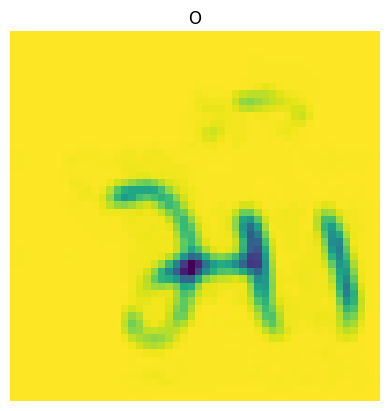

In [8]:
show_img()

In [9]:
data.shape

(985932, 50, 50)

In [10]:
labels.shape

(985932,)

In [11]:

data[0].shape

(50, 50)

In [12]:

data.size

2464830000

In [13]:
data[0].size

2500

In [14]:

data.ndim

3

In [15]:
data[0].ndim

2

In [16]:

classes = np.unique(labels)
classes

array(['A', 'AH', 'AI', 'AMN', 'AR', 'AU', 'E', 'EE', 'I', 'O', 'OO',
       'RA', 'RU', 'U'], dtype='<U3')

In [17]:
num_classes = len(classes)
num_classes

14

In [18]:
value_counts = {}
for char in classes:
    cnt = np.count_nonzero(labels == char)
    value_counts[char] = cnt

In [19]:
value_counts

{'A': 63314,
 'AH': 63311,
 'AI': 75913,
 'AMN': 66617,
 'AR': 55783,
 'AU': 63346,
 'E': 89017,
 'EE': 62814,
 'I': 74176,
 'O': 80796,
 'OO': 69774,
 'RA': 69150,
 'RU': 63076,
 'U': 88845}

In [20]:


min(value_counts.values())

55783

In [21]:
sorted_values = list(value_counts.values())

In [22]:
sorted_values.sort()

In [23]:
sorted_values[:5]

[55783, 62814, 63076, 63311, 63314]

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import time
import joblib

In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, Dropout,MaxPooling2D,Flatten
from keras.optimizers import Adam

In [26]:
# image_size = (50, 50)
# batch_size = 10

In [27]:
# Load data and labels
# data = np.load("")
# labels = np.load("")

# data = data / 255

In [28]:
# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(labels)

print((np.unique(numerical_labels)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [29]:


# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    data, numerical_labels, test_size=0.3, stratify=numerical_labels
)
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp
)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(690152, 50, 50)
(690152,)
(147890, 50, 50)
(147890,)
(147890, 50, 50)
(147890,)


In [30]:
# Rescale images to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Replicate the grayscale channel to create pseudo-RGB images
# X_train = np.repeat(X_train[..., np.newaxis], 3, -1)
# X_val = np.repeat(X_val[..., np.newaxis], 3, -1)
# X_test = np.repeat(X_test[..., np.newaxis], 3, -1)


In [31]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=len(np.unique(numerical_labels)))
y_val = to_categorical(y_val, num_classes=len(np.unique(numerical_labels)))
y_test = to_categorical(y_test, num_classes=len(np.unique(numerical_labels)))

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(690152, 50, 50)
(690152, 14)
(147890, 50, 50)
(147890, 14)
(147890, 50, 50)
(147890, 14)


In [32]:

# On-the-fly data augmentation
# X_traingen = ImageDataGenerator(
#     rotation_range=12,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.4,
#     zoom_range=0.1,
#     brightness_range=(0.5,1.2),
#     fill_mode='nearest'
# )

In [33]:
# train_generator = X_traingen.flow(X_train, y_train, batch_size=batch_size)


In [34]:
# Load pre-trained ResNet50 model
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(50, 50, 3))


In [35]:
# Freeze the pre-trained layers
# for layer in base_model.layers:
#     layer.trainable = False


In [36]:
# Build the complete model
# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(len(np.unique(numerical_labels)), activation='softmax')
# ])

In [38]:
# Define the CNN model with more convolutional and dense layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))
# Added a second convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
# Added a third convolutional layer with 128 filters
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
# Added a fourth convolutional layer with 256 filters
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))  # Increased the size of the first dense layer
model.add(Dropout(0.4))  # Increased the dropout rate to 0.4
# Added a second dense layer with 256 units
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Added dropout to the second dense layer
model.add(Dense(len(np.unique(numerical_labels)), activation='softmax')) # Use number of unique labels


In [39]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [40]:
# Display the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 6, 6, 128)        

In [41]:
# Train the model with early stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

In [43]:
start_time = time.time()
history = model.fit(
    X_train,y_train,
    # train_generator,
    # steps_per_epoch=len(X_train) // batch_size,
    epochs=40,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)
end_time = time.time()
training_time = end_time - start_time
print(training_time)

Epoch 1/40
21568/21568 [==============================] - 113s 5ms/step - loss: 0.8361 - accuracy: 0.7230 - val_loss: 0.4130 - val_accuracy: 0.8676
Epoch 2/40
21568/21568 [==============================] - 110s 5ms/step - loss: 0.4161 - accuracy: 0.8691 - val_loss: 0.3572 - val_accuracy: 0.8847
Epoch 3/40
21568/21568 [==============================] - 109s 5ms/step - loss: 0.3608 - accuracy: 0.8870 - val_loss: 0.2988 - val_accuracy: 0.9039
Epoch 4/40
21568/21568 [==============================] - 110s 5ms/step - loss: 0.3284 - accuracy: 0.8977 - val_loss: 0.2899 - val_accuracy: 0.9068
Epoch 5/40
21568/21568 [==============================] - 110s 5ms/step - loss: 0.3165 - accuracy: 0.9025 - val_loss: 0.2751 - val_accuracy: 0.9124
Epoch 6/40
21568/21568 [==============================] - 109s 5ms/step - loss: 0.3021 - accuracy: 0.9069 - val_loss: 0.2744 - val_accuracy: 0.9142
Epoch 7/40
21568/21568 [==============================] - 109s 5ms/step - loss: 0.2906 - accuracy: 0.9108 - val_

In [53]:
# Save training history to a text file
import os
os.chdir("/content/drive/MyDrive/Phd_project/models/analysis_files")

# with open(f'{file_name}.txt', 'w') as file:
#     file.write(f"{file_name}\n\n")
#     file.write(f"Training time : {training_time}\n")
#     file.write(str(history.history))
with open(f'Vowel_deep_model_gray_v2.txt', 'w') as file:
    file.write(f"{file_name}\n\n")
    file.write(f"Training time : {training_time}\n")
    file.write(str(history.history))

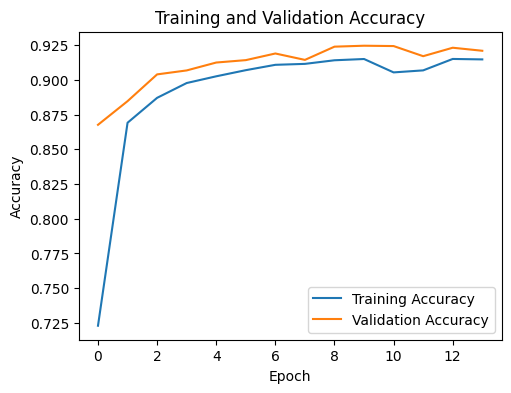

In [54]:
# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

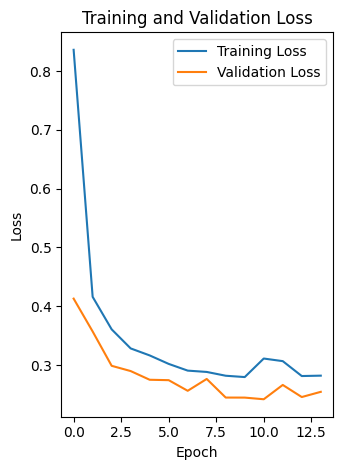

In [55]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [56]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


4622/4622 [==============================] - 11s 2ms/step - loss: 0.2432 - accuracy: 0.9233
Test Accuracy: 92.33%


In [57]:
# Generate predictions
predictions = model.predict(X_test)


4622/4622 [==============================] - 9s 2ms/step


In [58]:
# Convert one-hot encoded labels back to numerical labels
true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(predictions, axis=1)


In [59]:
# Convert numerical labels back to string labels
true_labels_str = label_encoder.inverse_transform(true_labels)
predicted_labels_str = label_encoder.inverse_transform(predicted_labels)


In [60]:
# Generate and save classification report and confusion matrix
classification_rep = classification_report(true_labels_str, predicted_labels_str)
confusion_mat = confusion_matrix(true_labels_str, predicted_labels_str,labels=np.unique(true_labels_str))


In [ ]:
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=predicted_labels_str, yticklabels=true_labels_str)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

KeyboardInterrupt: 

In [62]:
import os
os.chdir("/content/drive/MyDrive/Phd_project/models/analysis_files")
with open(f'Vowel_deep_model_gray_v2.txt', 'a') as file:
    file.write(f"Classification Report :\n{classification_rep}")
    file.write(f"Confusion Metrix :\n{confusion_mat}\n\n")
    file.write(f"Test_loss : {test_loss} \nTest_accuracy : {test_accuracy}")



In [64]:
np.savetxt('confusion_matrix_vow_gray_v2.txt', confusion_mat, fmt='%d')


In [65]:
print(f"Classification Report : {classification_rep}")
print(f"confusion_matrix : {confusion_mat}")


Classification Report :               precision    recall  f1-score   support

           A       0.90      0.96      0.93      9497
          AH       0.96      0.92      0.94      9496
          AI       0.91      0.93      0.92     11387
         AMN       0.89      0.90      0.90      9993
          AR       0.93      0.91      0.92      8368
          AU       0.92      0.90      0.91      9502
           E       0.91      0.90      0.91     13352
          EE       0.93      0.95      0.94      9422
           I       0.98      0.96      0.97     11127
           O       0.92      0.90      0.91     12119
          OO       0.87      0.92      0.89     10466
          RA       0.89      0.88      0.88     10372
          RU       0.92      0.86      0.89      9462
           U       1.00      1.00      1.00     13327

    accuracy                           0.92    147890
   macro avg       0.92      0.92      0.92    147890
weighted avg       0.92      0.92      0.92    147890

c

In [66]:
model.save('/content/drive/MyDrive/models/Vowel_model_gray_v2.h5')
joblib.dump(label_encoder, '/content/drive/MyDrive/models/Vowel_label_encoder_gray_v2.joblib')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['/content/drive/MyDrive/models/Vowel_label_encoder_gray_v2.joblib']

In [67]:
np.save('/content/drive/MyDrive/Phd_project/models/Vowel_label_encoder_gray_v2.npy', label_encoder.classes_)

In [68]:
predicted_labels_str

array(['E', 'RU', 'OO', ..., 'OO', 'AH', 'RU'], dtype='<U3')